# PCA on the whole dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA, SparsePCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from preprocessing import preprocessing_na, clean_categorical

In [ ]:
#Download the data
df = pd.read_csv('../data/train_data.zip')
df.head()

## Regular PCA

### Without categorical features

In [10]:
clean_data = preprocessing_na(df)

In [11]:
#Drop categorical features
categorical_features = clean_data.loc[:, clean_data.dtypes == "object"]
categorical_features.columns

Index(['external_id', 'state', 'income_class', 'density_class', 'climate'], dtype='object')

In [12]:
#Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(clean_data.drop(columns = ['unacast_session_count'] + list(categorical_features.columns)))

In [13]:
X_scaled.shape

(50120, 809)

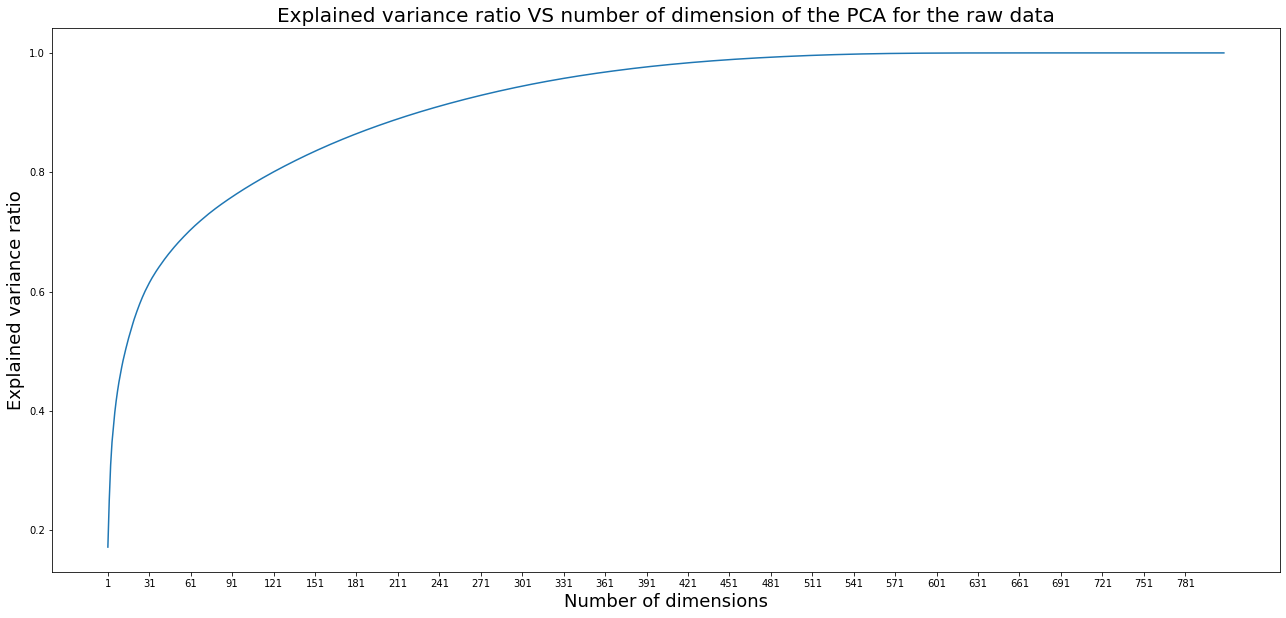

In [17]:
# Creating and fitting the model
pca = PCA().fit(X_scaled)

# Plotting the variance explained;
plt.figure(figsize=(22,10))
plt.plot(range(1,X_scaled.shape[1] + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xticks(range(1,X_scaled.shape[1] + 1, 30))
plt.xlabel('Number of dimensions', fontsize=18)
plt.ylabel('Explained variance ratio', fontsize=18)
plt.title('Explained variance ratio VS number of dimension of the PCA for the raw data', fontsize=20);


# On the preprocessed dataset

In [10]:
clean_data_cat = clean_categorical(preprocessing_na(df))

#Drop categorical features
categorical_features_cat = clean_data_cat.loc[:, clean_data_cat.dtypes == "object"]
categorical_features_cat.columns

Index(['external_id', 'state'], dtype='object')

In [11]:
#Scale the data
scaler_cat = StandardScaler()
X_scaled_cat = scaler_cat.fit_transform(clean_data_cat.drop(columns = ['unacast_session_count'] + 
                                                            list(categorical_features_cat.columns)))

In [12]:
X_scaled_cat.shape

(50120, 818)

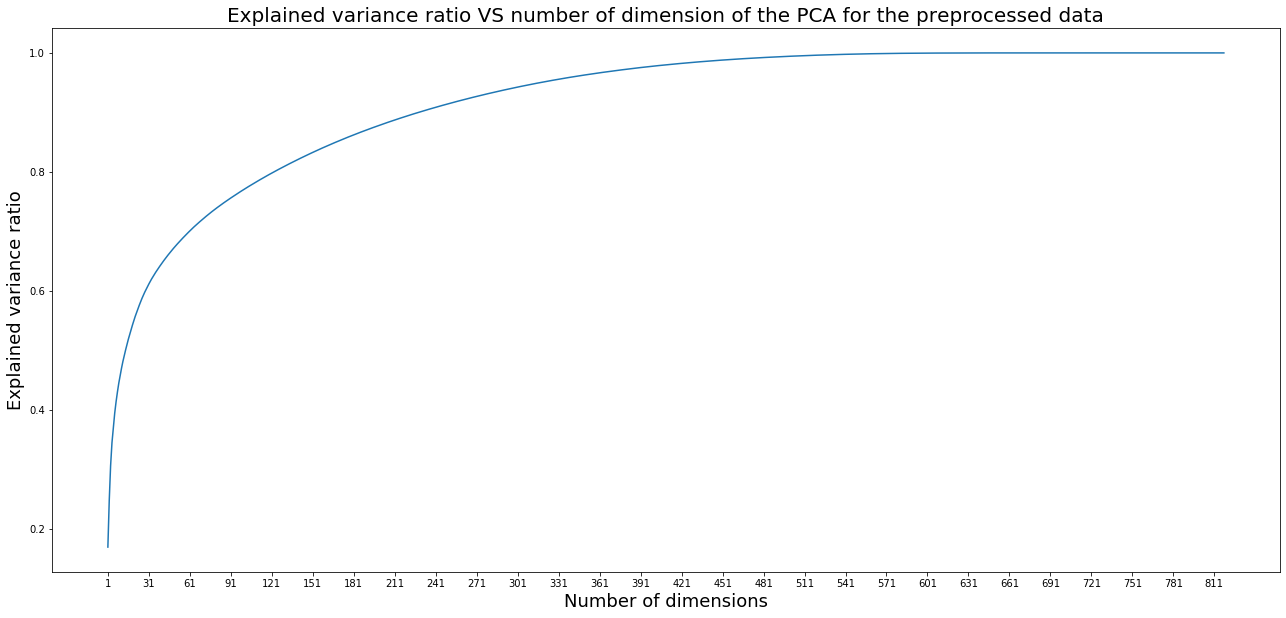

In [16]:
# Creating and fitting the model
pca_cat = PCA().fit(X_scaled_cat)

# Plotting the variance explained;
plt.figure(figsize=(22,10))
plt.plot(range(1,X_scaled_cat.shape[1] + 1), np.cumsum(pca_cat.explained_variance_ratio_))
plt.xticks(range(1,X_scaled_cat.shape[1] + 1, 30))
plt.xlabel('Number of dimensions', fontsize=18)
plt.ylabel('Explained variance ratio', fontsize=18)
plt.title('Explained variance ratio VS number of dimension of the PCA for the preprocessed data', fontsize=20);



## Sparce PCA

In [ ]:
alpha = 1
spca = SparsePCA(n_components=X_scaled.shape[1], alpha = alpha)
spca.fit(X_scaled)
print(f"Components for alpha={alpha}:\n{spca.components_}\n")

plt.figure(figsize=(22,10))
plt.plot(range(1,X_scaled_cat.shape[1] + 1), np.cumsum(pca_cat.explained_variance_ratio_))
plt.xticks(range(1,X_scaled_cat.shape[1] + 1, 30))
plt.xlabel('Number of dimensions', fontsize=18)
plt.ylabel('Explained variance ratio', fontsize=18)
plt.title('Explained variance ratio VS number of dimension of the PCA for the preprocessed data', fontsize=20);


This code took too long to run, I'm waiting to have the EC2 instance.